**Purpose:** The purpose of this notebook is to analyze the available data and assess which features require clean up and/or elimination.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## A. Load CSVs

In [4]:
file = 'patient_profiles.csv'
filepath = os.getcwd()+'/output/'+file

df_pat = pd.read_csv(filepath)
df_pat.head()

,demographics_age,demographics_gender,demographics_race,institution,patient_id,status_alcohol_usage,status_bmi_level,status_cohort_qualifier,status_comorbidity_index,status_days_since_diagnosis,status_disease_sub_type,status_exercise_frequency,status_months_since_diagnosis,status_smoking_status
0,68.0,Female,NaN,Saint Penelope Medical Center,102bb8fae,NaN,NaN,True,0.0,NaN,A,NaN,1.0,never
1,66.0,Female,White,Saint Penelope Medical Center,10e32947f,NaN,NaN,True,NaN,NaN,A,NaN,0.0,former
2,61.0,Male,White,Saint Penelope Medical Center,11156e14a,NaN,NaN,True,1.0,NaN,A,NaN,16.0,never
3,62.0,Male,NaN,Saint Penelope Medical Center,113d8066d,NaN,NaN,True,NaN,NaN,B,NaN,0.0,current
4,59.0,Male,NaN,Saint Penelope Medical Center,113ec3f1,NaN,NaN,True,NaN,NaN,A,NaN,9.0,former


In [5]:
file = 'biomarkers.csv'
filepath = os.getcwd()+'/input/'+file

df_bio = pd.read_csv(filepath)
df_bio.head()

,biomarker_id,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,BM00009,BM00010,BM00011,BM00012,BM00013,BM00014,BM00015,BM00016,BM00017,BM00018,BM00019,BM00020,BM00021,BM00022,BM00023,BM00024,BM00025,BM00026,BM00027,BM00028,BM00029,BM00030,BM00031,BM00032,BM00033,BM00034,BM00035,BM00036,BM00037,BM00038,BM00039,BM00040,BM00041,BM00042,BM00043,BM00044,BM00045,BM00046,BM00047,BM00048,BM00049,BM00050,BM00051,BM00052,BM00053,BM00054,BM00055,BM00056,BM00057,BM00058,BM00059,BM00060,BM00061,BM00062,BM00063,BM00064,BM00065,BM00066,BM00067,BM00068,BM00069,BM00070,BM00071,BM00072,BM00073,BM00074,BM00075,BM00076,BM00077,BM00078,BM00079,BM00080,BM00081,BM00082,BM00083,BM00084,BM00085,BM00086,BM00087,BM00088,BM00089,BM00090,BM00091,BM00092,BM00093,BM00094,BM00095,BM00096,BM00097,BM00098,BM00099,BM00100,BM00101,BM00102,BM00103,BM00104,BM00105,BM00106,BM00107,BM00108,BM00109,BM00110,BM00111,BM00112,BM00113,BM00114,BM00115,BM00116,BM00117,BM00118,BM00119,BM00120,BM00121,BM00122,BM00123,BM00124,BM00125,BM00126,BM00127,BM00128,BM00129,BM00130,BM00131,BM00132,BM00133,BM00134,BM00135,BM00136,BM00137,BM00138,BM00139,BM00140,BM00141,BM00142,BM00143,BM00144,BM00145,BM00146,BM00147,BM00148,BM00149,BM00150,BM00151,BM00152,BM00153,BM00154,BM00155,BM00156,BM00157,BM00158,BM00159,BM00160,BM00161,BM00162,BM00163,BM00164,BM00165,BM00166,BM00167,BM00168,BM00169,BM00170,BM00171,BM00172,BM00173,BM00174,BM00175,BM00176,BM00177,BM00178,BM00179,BM00180,BM00181,BM00182,BM00183,BM00184,BM00185,BM00186,BM00187,BM00188,BM00189,BM00190,BM00191,BM00192,BM00193,BM00194,BM00195,BM00196,BM00197,BM00198,BM00199,BM00200,BM00201,BM00202,BM00203,BM00204,BM00205,BM00206,BM00207,BM00208,BM00209,BM00210,BM00211,BM00212,BM00213,BM00214,BM00215,BM00216,BM00217,BM00218,BM00219,BM00220,BM00221,BM00222,BM00223,BM00224,BM00225,BM00226,BM00227,BM00228,BM00229,BM00230,BM00231,BM00232,BM00233,BM00234,BM00235,BM00236,BM00237,BM00238,BM00239,BM00240,BM00241,BM00242,BM00243,BM00244,BM00245,BM00246,BM00247,BM00248,BM00249,BM00250,BM00251,BM00252,BM00253,BM00254,BM00255,BM00256,BM00257,BM00258,BM00259,BM00260,BM00261,BM00262,BM00263,BM00264,BM00265,BM00266,BM00267,BM00268,BM00269,BM00270,BM00271,BM00272,BM00273,BM00274,BM00275,BM00276,BM00277,BM00278,BM00279,BM00280,BM00281,BM00282,BM00283,BM00284,BM00285,BM00286,BM00287,BM00288,BM00289,BM00290,BM00291,BM00292,BM00293,BM00294,BM00295,BM00296,BM00297,BM00298,BM00299,BM00300,BM00301,BM00302,BM00303,BM00304,BM00305,BM00306,BM00307,BM00308,BM00309,BM00310,BM00311,BM00312,BM00313,BM00314,BM00315,BM00316,BM00317,BM00318,BM00319,BM00320,BM00321,BM00322,BM00323,BM00324,BM00325,BM00326,BM00327,BM00328,BM00329,BM00330,BM00331,BM00332,BM00333,BM00334,BM00335,BM00336,BM00337,BM00338,BM00339,BM00340,BM00341,BM00342,BM00343,BM00344,BM00345,BM00346,BM00347,BM00348,BM00349,BM00350,BM00351,BM00352,BM00353,BM00354,BM00355,BM00356,BM00357,BM00358,BM00359,BM00360,BM00361,BM00362,BM00363,BM00364,BM00365,BM00366,BM00367,BM00368,BM00369,BM00370,BM00371,BM00372,BM00373,BM00374,BM00375,BM00376,BM00377,BM00378,BM00379,BM00380,BM00381,BM00382,BM00383,BM00384,BM00385,BM00386,BM00387,BM00388,BM00389,BM00390,BM00391,BM00392,BM00393,BM00394,BM00395,BM00396,BM00397,BM00398,BM00399,BM00400,BM00401,BM00402,BM00403,BM00404,BM00405,BM00406,BM00407,BM00408,BM00409,BM00410,BM00411,BM00412,BM00413,BM00414,BM00415,BM00416,BM00417,BM00418,BM00419,BM00420,BM00421,BM00422,BM00423,BM00424,BM00425,BM00426,BM00427,BM00428,BM00429,BM00430,BM00431,BM00432,BM00433,BM00434,BM00435,BM00436,BM00437,BM00438,BM00439,BM00440,BM00441,BM00442,BM00443,BM00444,BM00445,BM00446,BM00447,BM00448,BM00449,BM00450,BM00451,BM00452,BM00453,BM00454,BM00455,BM00456,BM00457,BM00458,BM00459,BM00460,BM00461,BM00462,BM00463,BM00464,BM00465,BM00466,BM00467,BM00468,BM00469,BM00470,BM00471,BM00472,BM00473,BM00474,BM00475,BM00476,BM00477,BM00478,BM00479,BM00480,BM00481,BM00482,BM00483,BM00484,BM00485,BM00486,BM00487,BM00488,BM00489,BM00490,BM00491,BM00492,BM00493,BM00494,BM00495,BM00496,BM00497,BM

In [6]:
file = 'targets.csv'
filepath = os.getcwd()+'/input/'+file

df_t = pd.read_csv(filepath)
df_t.head()

,patient_id,biomarker_id,target_label
0,1002df1d3,89c43bb4,0
1,1010441f,3ae31327,0
2,101eb6af1,1d8f7bab9,0
3,10204394e,129ee8c6c,0
4,1021d329b,1b44145bd,0


## B. Quick Analysis & Clean Up

In [7]:
df_t.groupby(['target_label'], as_index=False).agg({'patient_id':'count'})

,target_label,patient_id
0,0,1353
1,1,381


In [8]:
print('Binomal Classification problem with ',round((381/len(df_t))*100,2), \
      '% having the target within the available population')

Binomal Classification problem with  21.97 % having the target within the available population


In [9]:
print('Ensuring uniqueness across all ids: ',len(df_t),len(df_t['patient_id'].unique()), \
      len(df_t['biomarker_id'].unique()))

Ensuring uniqueness across all ids:  1734 1734 1734


### NULL Analysis - Bio Markers

In [10]:
bio_missing = df_bio.isna()
bio_missing = bio_missing.sum()
df_bio_missing = pd.DataFrame(bio_missing,columns=['na_count'])
df_bio_missing.sort_values(by='na_count',ascending=False)

,na_count
BM01671,772
BM03527,772
BM13623,772
BM05796,772
BM12352,772
BM12159,772
BM05569,772
BM14622,772
BM08498,772
BM11523,772


In [11]:
df_bio2 = pd.merge(df_bio,df_t[['biomarker_id']],on='biomarker_id',how='inner')
bio_missing = df_bio2.isna()
bio_missing = bio_missing.sum()
df_bio_missing = pd.DataFrame(bio_missing,columns=['na_count'])
df_bio_missing.reset_index(inplace=True)
df_bio_missing.sort_values(by='na_count',ascending=False)

,index,na_count
1672,BM01671,696
3528,BM03527,696
13624,BM13623,696
5797,BM05796,696
12353,BM12352,696
12160,BM12159,696
5570,BM05569,696
14623,BM14622,696
8499,BM08498,696
11524,BM11523,696


In [12]:
len(df_bio_missing[df_bio_missing['na_count'] > 0])

46

**Suggestion:** Remove the 46 columns in the biomarker.csv where there are 696 nulls (772 before merge with target file) as these will not be useful in the predictive model.

In [13]:
remove_list = list(df_bio_missing['index'][df_bio_missing['na_count'] > 0])
df_bio = df_bio.drop(remove_list,axis=1)

### NULL Analysis - Patient Profiles

In [14]:
pat_missing = df_pat.isna()
pat_missing = pat_missing.sum()
df_pat_missing = pd.DataFrame(pat_missing,columns=['na_count'])
df_pat_missing.sort_values(by='na_count',ascending=False)

,na_count
status_days_since_diagnosis,2219
status_bmi_level,2085
status_alcohol_usage,1973
status_exercise_frequency,1973
status_comorbidity_index,1866
demographics_race,593
demographics_age,132
status_months_since_diagnosis,132
status_smoking_status,132
demographics_gender,0


In [15]:
df_pat2 = pd.merge(df_pat,df_t[['patient_id']],on='patient_id',how='inner')
pat_missing = df_pat2.isna()
pat_missing = pat_missing.sum()
df_pat_missing = pd.DataFrame(pat_missing,columns=['na_count'])
df_pat_missing.sort_values(by='na_count',ascending=False)

,na_count
status_days_since_diagnosis,1611
status_bmi_level,1506
status_alcohol_usage,1404
status_exercise_frequency,1404
status_comorbidity_index,1381
demographics_race,458
demographics_age,123
status_months_since_diagnosis,123
status_smoking_status,123
demographics_gender,0


**Suggestion:** As there are only 1734 patients in the target file, will need to handle the NULLs carefully:
* status_days_since_diagnosis (available for Goodfellow --> divide by 30 and fill status_months_since_diagnosis)
* status_bmi_level (available for 1 instiution)
* status_alcohol_usage (available for 1 instiution)
* status_exercise_frequency (available for 1 instiution)
* status_comorbidity_index (definitely remove as missing across all institutions)

The remaining 4 features with NULLs can try to be inferred.

In [16]:
df_pat = df_pat.drop('status_comorbidity_index',axis=1)

### Column Clean Up and Removal

In [17]:
#The following columns only have one value
df_pat['status_cohort_qualifier'].unique()

df_pat = df_pat.drop('status_cohort_qualifier',axis=1)

Removed status_cohort_qualifier as only had 1 value. 

In [18]:
#df_pat.status_smoking_status.unique()
df_pat['status_smoking_status'] = df_pat['status_smoking_status'].fillna('Missing')
df_pat['status_smoking_status_fixed'] = np.where(df_pat['status_smoking_status'].isin(['never','NEVER']),'NEVER',
                                          (np.where(df_pat['status_smoking_status'].isin(['former','FORMER']),'FORMER',
                                          (np.where(df_pat['status_smoking_status'].isin(['CURRENT','current']),'CURRENT',
                                          (np.where(df_pat['status_smoking_status'].isin(['unknown','UNKNOWN','Missing']),'UNKNOWN','Uncategorized'
                                          )))))))

#df_pat.groupby(['status_smoking_status','status_smoking_status2'],as_index=False).agg({'patient_id':'count'})

df_pat['demographics_gender_fixed'] = np.where(df_pat['demographics_gender'].isin(['FEMALE','Female']),'F','M')

#df_pat.groupby(['demographics_gender','demographics_gender_fixed'],as_index=False).agg({'patient_id':'count'})

df_pat['demographics_race'] = df_pat['demographics_race'].fillna('Missing')
df_pat['demographics_race_fixed'] = np.where(df_pat['demographics_race'].isin(['American Indian or Alaska Native','AMERICAN INDIAN OR ALASKA NATIVE']),'AMERICAN INDIAN OR ALASKA NATIVE',
                                            (np.where(df_pat['demographics_race'].isin(['ASIAN','Asian']),'ASIAN',
                                            (np.where(df_pat['demographics_race'].isin(['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER','Native Hawaiian or Other Pacific Islander']),'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
                                            (np.where(df_pat['demographics_race'].isin(['BLACK OR AFRICAN AMERICAN','Black or African American']),'BLACK OR AFRICAN AMERICAN',
                                            (np.where(df_pat['demographics_race'].isin(['WHITE','White']),'WHITE','Missing')))))))))

#df_pat.groupby(['demographics_race','demographics_race_fixed'],as_index=False).agg({'patient_id':'count'})

Cleaned up the following columns as there were values that were redundant:
* status_smoking_status
* demographics_gender
* demographics_race

In [19]:
#the following two columns are the same, Goodfellow measured by days where as all other facilities measured by months for status since diagnosis

df_pat['status_months_since_diagnosis_fixed'] = np.where(df_pat['status_months_since_diagnosis'].isnull(),round(df_pat['status_days_since_diagnosis']/30,0),df_pat['status_months_since_diagnosis'])


In [20]:
drop_list = ['status_smoking_status','demographics_gender','demographics_race','status_months_since_diagnosis','status_days_since_diagnosis']
df_pat = df_pat.drop(drop_list,axis=1)

### Interesting Findings for where NULLs exist

In [21]:
df_pat.groupby(['institution','demographics_race_fixed']).agg({'patient_id':'count'})

patient_id
institution                   demographics_race_fixed                              
BioLab, Inc.                  AMERICAN INDIAN OR ALASKA NATIVE                    5
                              ASIAN                                              75
                              BLACK OR AFRICAN AMERICAN                         169
                              Missing                                           174
                              NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER          11
                              WHITE                                             359
Goodfellow Research Institute Missing                                           132
Johnson & Bloom Hospitals     ASIAN                                              10
                              BLACK OR AFRICAN AMERICAN                          11
                              Missing                                             9
                              WHITE                                              32
Medical Information Exchange  AMERICAN INDIAN OR ALASKA NATIVE                    2
                              ASIAN                                              39
                              BLACK OR AFRICAN AMERICAN                          68
                              Missing                                            85
                              NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER           1
                              WHITE                                             199
Montague Hospital             AMERICAN INDIAN OR ALASKA NATIVE                    4
                              ASIAN                                              41
                              BLACK OR AFRICAN AMERICAN                          68
                              Missing                                            72
                              NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER           4
                              WHITE                                             189
Saint Penelope Medical Center AMERICAN INDIAN OR ALASKA NATIVE                    1
                              ASIAN                                              22
                              BLACK OR AFRICAN AMERICAN                          61
                              Missing                                            50
                              NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER           1
                              WHITE                                             122
University Hospital System    AMERICAN INDIAN OR ALASKA NATIVE                    3
                              ASIAN                                              34
                              BLACK OR AFRICAN AMERICAN                          51
                              Missing                                            71
                              NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER           2
                              WHITE                                             174

In [22]:
df_pat['status_alcohol_usage'] = df_pat['status_alcohol_usage'].fillna('Missing')

df_pat.groupby(['institution','status_alcohol_usage']).agg({'patient_id':'count'})

patient_id
institution                   status_alcohol_usage            
BioLab, Inc.                  Missing                      793
Goodfellow Research Institute Missing                      132
Johnson & Bloom Hospitals     Missing                       62
Medical Information Exchange  Missing                      394
Montague Hospital             HIGH                          29
                              LOW                          133
                              MODERATE                     157
                              NONE                          59
Saint Penelope Medical Center Missing                      257
University Hospital System    Missing                      335

In [23]:
df_pat['status_exercise_frequency'] = df_pat['status_exercise_frequency'].fillna('Missing')

df_pat.groupby(['institution','status_exercise_frequency']).agg({'patient_id':'count'})

patient_id
institution                   status_exercise_frequency            
BioLab, Inc.                  Missing                           793
Goodfellow Research Institute Missing                           132
Johnson & Bloom Hospitals     Missing                            62
Medical Information Exchange  Missing                           394
Montague Hospital             0.0                               295
                              1.0                                61
                              2.0                                22
Saint Penelope Medical Center Missing                           257
University Hospital System    Missing                           335

In [24]:
df_pat['status_bmi_level'] = df_pat['status_bmi_level'].fillna('Missing')
df_pat.groupby(['institution','status_bmi_level']).agg({'patient_id':'count'})

patient_id
institution                   status_bmi_level            
BioLab, Inc.                  Missing                  793
Goodfellow Research Institute Missing                  132
Johnson & Bloom Hospitals     Missing                   62
Medical Information Exchange  Missing                  394
Montague Hospital             Missing                  112
                              normal                   152
                              obese                     17
                              overweight                74
                              underweight               23
Saint Penelope Medical Center Missing                  257
University Hospital System    Missing                  335

In [25]:
df_pat['demographics_age_flag'] = np.where(df_pat['demographics_age'].isnull(),'Missing','Data Available')

df_pat.groupby(['institution','demographics_age_flag']).agg({'patient_id':'count'})

,,patient_id
institution,demographics_age_flag,
"BioLab, Inc.",Data Available,793
Goodfellow Research Institute,Missing,132
Johnson & Bloom Hospitals,Data Available,62
Medical Information Exchange,Data Available,394
Montague Hospital,Data Available,378
Saint Penelope Medical Center,Data Available,257
University Hospital System,Data Available,335


### Fill in NULL Values

#### AGE

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  9.,  17.,  64., 137., 270., 476., 550., 477., 186.,  33.]),
 array([24. , 29.9, 35.8, 41.7, 47.6, 53.5, 59.4, 65.3, 71.2, 77.1, 83. ]),
 <a list of 10 Patch objects>)

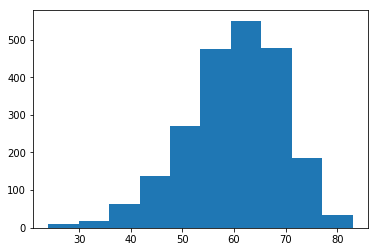

In [26]:
plt.hist(df_pat['demographics_age'])

Text(0.5, 1.0, 'University Hospital System')

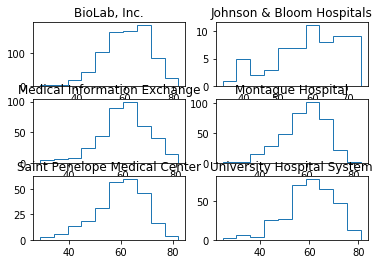

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

ax0.hist(df_pat['demographics_age'][df_pat['institution'] == 'BioLab, Inc.'], histtype='step', fill=False)
ax0.set_title('BioLab, Inc.')

ax1.hist(df_pat['demographics_age'][df_pat['institution'] == 'Johnson & Bloom Hospitals'], histtype='step', fill=False)
ax1.set_title('Johnson & Bloom Hospitals')

ax2.hist(df_pat['demographics_age'][df_pat['institution'] == 'Medical Information Exchange'], histtype='step', fill=False)
ax2.set_title('Medical Information Exchange')

ax3.hist(df_pat['demographics_age'][df_pat['institution'] == 'Montague Hospital'], histtype='step', fill=False)
ax3.set_title('Montague Hospital')

ax4.hist(df_pat['demographics_age'][df_pat['institution'] == 'Saint Penelope Medical Center'], histtype='step', fill=False)
ax4.set_title('Saint Penelope Medical Center')

ax5.hist(df_pat['demographics_age'][df_pat['institution'] == 'University Hospital System'], histtype='step', fill=False)
ax5.set_title('University Hospital System')

The institutions are all fairly normal (exception of Johnson & Bloom) and all center around the same age. Therefore, will fill the age nulls and Goodfellow with the average age from the other data. 

In [28]:
df_pat['demographics_age'] = df_pat['demographics_age'].fillna(df_pat['demographics_age'].mean())

#### RACE

Because a majority of patients have a race = 'White', will just fill in the NULLs with 'White'

In [29]:
#df_pat['demographics_race_fixed'] = df_pat['demographics_race_fixed'].fillna('WHITE')
df_pat['demographics_race_fixed'] = np.where(df_pat['demographics_race_fixed'] == 'Missing','WHITE', df_pat['demographics_race_fixed'])

## C. Save Files

In [30]:
df_pat = df_pat.drop('demographics_age_flag',axis=1)

In [31]:
file = 'patient_profiles_final.csv'
filepath = os.getcwd()+'/output/'+file

df_pat.to_csv(filepath,index=False)

file = 'biomarkers_final.csv'
filepath = os.getcwd()+'/output/'+file

df_bio.to_csv(filepath,index=False)

## C. Chi Square Test for Biomarkers

As there are a high volume of biomarkers, will attempt to further eliminate if any are not independent from one another.

Testing at 95% cconfidence interval (alpha = 0.05), df = (2–1) * (2–1) = 1 (for all since binary) --> Critical Chi-Square Value = 3.84

* H0: Two variables are independent.
* H1: Two variables are not independent./Two variables are dependent.

Unable to reject H0 if Chi-Square < Critical Value 3.84

In [32]:
model_df = pd.merge(df_t,df_bio,on='biomarker_id', how='inner')

In [33]:
model_df.head()

,patient_id,biomarker_id,target_label,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,BM00009,BM00010,BM00011,BM00012,BM00013,BM00014,BM00015,BM00016,BM00017,BM00018,BM00019,BM00020,BM00021,BM00022,BM00023,BM00024,BM00025,BM00026,BM00027,BM00028,BM00029,BM00030,BM00031,BM00032,BM00033,BM00034,BM00035,BM00036,BM00037,BM00038,BM00039,BM00040,BM00041,BM00042,BM00043,BM00044,BM00045,BM00046,BM00047,BM00048,BM00049,BM00050,BM00051,BM00052,BM00053,BM00054,BM00055,BM00056,BM00057,BM00058,BM00059,BM00060,BM00061,BM00062,BM00063,BM00064,BM00065,BM00066,BM00067,BM00068,BM00069,BM00070,BM00071,BM00072,BM00073,BM00074,BM00075,BM00076,BM00077,BM00078,BM00079,BM00080,BM00081,BM00082,BM00083,BM00084,BM00085,BM00086,BM00087,BM00088,BM00089,BM00090,BM00091,BM00092,BM00093,BM00094,BM00095,BM00096,BM00097,BM00098,BM00099,BM00100,BM00101,BM00102,BM00103,BM00104,BM00105,BM00106,BM00107,BM00108,BM00109,BM00110,BM00111,BM00112,BM00113,BM00114,BM00115,BM00116,BM00117,BM00118,BM00119,BM00120,BM00121,BM00122,BM00123,BM00124,BM00125,BM00126,BM00127,BM00128,BM00129,BM00130,BM00131,BM00132,BM00133,BM00134,BM00135,BM00136,BM00137,BM00138,BM00139,BM00140,BM00141,BM00142,BM00143,BM00144,BM00145,BM00146,BM00147,BM00148,BM00149,BM00150,BM00151,BM00152,BM00153,BM00154,BM00155,BM00156,BM00157,BM00158,BM00159,BM00160,BM00161,BM00162,BM00163,BM00164,BM00165,BM00166,BM00167,BM00168,BM00169,BM00170,BM00171,BM00172,BM00173,BM00174,BM00175,BM00176,BM00177,BM00178,BM00179,BM00180,BM00181,BM00182,BM00183,BM00184,BM00185,BM00186,BM00187,BM00188,BM00189,BM00190,BM00191,BM00192,BM00193,BM00194,BM00195,BM00196,BM00197,BM00198,BM00199,BM00200,BM00201,BM00202,BM00203,BM00204,BM00205,BM00206,BM00207,BM00208,BM00209,BM00210,BM00211,BM00212,BM00213,BM00214,BM00215,BM00216,BM00217,BM00218,BM00219,BM00220,BM00221,BM00222,BM00223,BM00224,BM00225,BM00226,BM00227,BM00228,BM00229,BM00230,BM00231,BM00232,BM00233,BM00234,BM00235,BM00236,BM00237,BM00238,BM00239,BM00240,BM00241,BM00242,BM00243,BM00244,BM00245,BM00246,BM00247,BM00248,BM00249,BM00250,BM00251,BM00252,BM00253,BM00254,BM00255,BM00256,BM00257,BM00258,BM00259,BM00260,BM00261,BM00262,BM00263,BM00264,BM00265,BM00266,BM00267,BM00268,BM00269,BM00270,BM00271,BM00272,BM00273,BM00274,BM00275,BM00276,BM00277,BM00278,BM00279,BM00280,BM00281,BM00282,BM00283,BM00284,BM00285,BM00286,BM00287,BM00288,BM00289,BM00290,BM00291,BM00292,BM00293,BM00294,BM00295,BM00296,BM00297,BM00298,BM00299,BM00300,BM00301,BM00302,BM00303,BM00304,BM00305,BM00306,BM00307,BM00308,BM00309,BM00310,BM00311,BM00312,BM00313,BM00314,BM00315,BM00316,BM00317,BM00318,BM00319,BM00320,BM00321,BM00322,BM00323,BM00324,BM00325,BM00326,BM00327,BM00328,BM00329,BM00330,BM00331,BM00332,BM00333,BM00334,BM00335,BM00336,BM00337,BM00338,BM00339,BM00340,BM00341,BM00342,BM00343,BM00344,BM00345,BM00346,BM00347,BM00348,BM00349,BM00350,BM00351,BM00352,BM00353,BM00354,BM00355,BM00356,BM00357,BM00358,BM00359,BM00360,BM00361,BM00362,BM00363,BM00364,BM00365,BM00366,BM00367,BM00368,BM00369,BM00370,BM00371,BM00372,BM00373,BM00374,BM00375,BM00376,BM00377,BM00378,BM00379,BM00380,BM00381,BM00382,BM00383,BM00384,BM00385,BM00386,BM00387,BM00388,BM00389,BM00390,BM00391,BM00392,BM00393,BM00394,BM00395,BM00396,BM00397,BM00398,BM00399,BM00400,BM00401,BM00402,BM00403,BM00404,BM00405,BM00406,BM00407,BM00408,BM00409,BM00410,BM00411,BM00412,BM00413,BM00414,BM00415,BM00416,BM00417,BM00418,BM00419,BM00420,BM00421,BM00422,BM00423,BM00424,BM00425,BM00426,BM00427,BM00428,BM00429,BM00430,BM00431,BM00432,BM00433,BM00434,BM00435,BM00436,BM00437,BM00438,BM00439,BM00440,BM00441,BM00442,BM00443,BM00444,BM00445,BM00446,BM00447,BM00448,BM00449,BM00450,BM00451,BM00452,BM00453,BM00454,BM00455,BM00456,BM00457,BM00458,BM00459,BM00460,BM00461,BM00462,BM00463,BM00464,BM00465,BM00466,BM00467,BM00468,BM00469,BM00470,BM00471,BM00472,BM00473,BM00474,BM00475,BM00476,BM00477,BM00478,BM00479,BM00480,BM00481,BM00482,BM00483,BM00484,BM00485,BM00486,BM00487,BM00488,BM00489,BM00490,BM00491,BM00492,BM00493,BM00494,BM

In [34]:
X = model_df.drop(['patient_id','biomarker_id','target_label'],axis=1)
y = model_df['target_label']
chi_scores = chi2(X,y)
chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values2 = pd.DataFrame(chi_values,columns=['chi'])
chi_values2.reset_index(inplace=True)
keep = chi_values2['index'][chi_values2['chi']>3.84].to_list()
keep.append('biomarker_id')

In [35]:
len(keep)

172

In [36]:
file = 'biomarkers_final_chi.csv'
filepath = os.getcwd()+'/output/'+file

df_bio[keep].to_csv(filepath,index=False)